In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import seaborn as sns
import pandas as pd
%matplotlib inline 

In [4]:
data = pd.read_csv('/content/drive/MyDrive/BI/data/titanic.csv')

In [5]:
data.shape

(2208, 10)

In [ ]:
# data.info()

preprocess


In [ ]:
data['joined'] = data['joined'].fillna('Southampton')

In [ ]:
data['age'] = data['age'].replace(9999,30)

In [ ]:
data = data.drop(['group','boat'],axis=1)

In [ ]:
data['fare'] = data['fare'].fillna(0)

In [ ]:
job_types = data['job'].value_counts().to_frame()
jobs = job_types[job_types['job']>22]
jobs = list(jobs.index)

In [ ]:
job_types = data['job'].value_counts().to_frame()
job_list = list(job_types[job_types['job']>22].index)

## dummy

In [ ]:
job = pd.get_dummies(data['job'])
job = job[job_list]

In [ ]:
classs = pd.get_dummies(data['class'])

In [ ]:
joined = pd.get_dummies(data['joined'])

## PCA

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(job)
job_pca = pd.DataFrame(data = principalComponents,columns = ['job_pca1', 'job_pca2'])

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(classs)
classs_pca = pd.DataFrame(data = principalComponents,columns = ['class_pca1', 'class_pca2'])

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(joined)
joined_pca = pd.DataFrame(data = principalComponents,columns = ['joined_pca1', 'joined_pca2'])

## concat

In [ ]:
print(data.shape)
data = pd.concat([job_pca,classs_pca,joined_pca,data], axis=1)
print(data.shape)

(2208, 8)
(2208, 14)


In [ ]:
data.columns

Index(['job_pca1', 'job_pca2', 'class_pca1', 'class_pca2', 'joined_pca1',
       'joined_pca2', 'name', 'gender', 'age', 'class', 'fare', 'joined',
       'job', 'survival'],
      dtype='object')

## drop obj

In [ ]:
data = data.drop(['job','class','joined','name'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   job_pca1     2208 non-null   float64
 1   job_pca2     2208 non-null   float64
 2   class_pca1   2208 non-null   float64
 3   class_pca2   2208 non-null   float64
 4   joined_pca1  2208 non-null   float64
 5   joined_pca2  2208 non-null   float64
 6   gender       2208 non-null   int64  
 7   age          2208 non-null   int64  
 8   fare         2208 non-null   float64
 9   survival     2208 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 172.6 KB


## corr

In [ ]:
# data.corr()['survival']

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# X = add_constant(data)
# pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

## Q1 : predict age=35 & class=1

## split train/test

In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train8, X_test2, y_train8, y_test2 = train_test_split(X,y, test_size =0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train7, X_test3, y_train7, y_test3 = train_test_split(X,y, test_size =0.3, random_state=1, stratify=y)

# superised algo

## logit

train/test > 0.7/0.3

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0,random_state=1)
lr.fit(X_train7,y_train7)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

In [ ]:
print('test accracy :%.3f' % lr.score(X_test3,y_test3))

test accracy :0.817


confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(lr.predict(X_test3),y_test3)

array([[445,  76],
       [ 45,  97]])

In [ ]:
pre = 97/(97+45)
recall = 97/(97+76)
f1 = 2/((1/pre)+(1/recall))

In [ ]:
print(pre)
print(recall)
print(f1)

0.6830985915492958
0.5606936416184971
0.6158730158730159


train/test > 0.8/0.2

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0,random_state=1)
lr.fit(X_train8,y_train8)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

In [ ]:
print('test accracy :%.3f' % lr.score(X_test2,y_test2))

test accracy :0.830


In [ ]:
confusion_matrix(lr.predict(X_test2),y_test2)

array([[300,  49],
       [ 26,  67]])

In [ ]:
pre = 67/(67+26)
recall = 67/(67+49)
f1 = 2/((1/pre)+(1/recall))

In [ ]:
print(pre)
print(recall)
print(f1)

0.7204301075268817
0.5775862068965517
0.6411483253588516


ex

In [ ]:
A=[0,0,0,0,0,1,1,1,1,1] #real

In [ ]:
B=[1,1,1,1,0,0,0,0,0,0] #predict

In [ ]:
confusion_matrix(B,A)

array([[1, 5],
       [4, 0]])

## random forest

train/test > 7/3

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)
forest.fit(X_train7,y_train7)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score
y_RFC_pred = forest.predict(X_test3)
accuracy_score(y_test3, y_RFC_pred)

0.8340874811463047

In [ ]:
confusion_matrix(y_RFC_pred,y_test3)

array([[444,  64],
       [ 46, 109]])

In [ ]:
pre = 109/(109+46)
recall = 109/(109+64)
f1 = 2/((1/pre)+(1/recall))

In [ ]:
print(pre)
print(recall)
print(f1)

0.7032258064516129
0.630057803468208
0.6646341463414634


train/test > 8/2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)
forest.fit(X_train8,y_train8)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [ ]:
from sklearn.metrics import accuracy_score
y_RFC_pred = forest.predict(X_test2)
accuracy_score(y_test2, y_RFC_pred)

0.8280542986425339

In [ ]:
confusion_matrix(y_RFC_pred,y_test2)

array([[291,  41],
       [ 35,  75]])

In [ ]:
pre = 75/(75+35)
recall = 75/(75+41)
f1 = 2/((1/pre)+(1/recall))

In [ ]:
print(pre)
print(recall)
print(f1)

0.6818181818181818
0.646551724137931
0.663716814159292


##xgboost

## decision tree

# nosuperised algo

### train/test > 7/3

kmean

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=100, tol=1e-04, random_state=0).fit(X_train7)

In [ ]:
y_kmeans_pred = km.predict(X_test3)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3, y_kmeans_pred)

0.7315233785822021

In [ ]:
# unique, counts = np.unique(y, return_counts=True)
# dict(zip(unique, counts))

{0: 1631, 1: 577}

In [ ]:
confusion_matrix(y_kmeans_pred,y_test3)

array([[484, 172],
       [  6,   1]])

In [ ]:
pre = 1/(1+6)
recall = 1/(1+172)
f1 = 2/((1/pre)+(1/recall))

In [ ]:
print(pre)
print(recall)
print(f1)

0.14285714285714285
0.005780346820809248
0.011111111111111112


### train/test > 8/2

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=100, tol=1e-04, random_state=0).fit(X_train8)

In [ ]:
y_kmeans_pred = km.predict(X_test2)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2, y_kmeans_pred)

0.7285067873303167

In [ ]:
confusion_matrix(y_kmeans_pred,y_test2)

array([[322, 116],
       [  4,   0]])

In [ ]:
pre = 0/(0+4)
recall = 0/(0+116)
# f1 = 2/((1/pre)+(1/recall))

In [ ]:
print(pre)
print(recall)
print(f1)

0.0
0.0
0.8429319371727748


# class1+age35

In [ ]:
select = pd.concat([classs,data[['age','survival']]], axis=1)

In [ ]:
# select.corr()['survival']

In [ ]:
select = select.drop('3',axis=1)

In [ ]:
# classs.corr()

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# X = add_constant(select)
# pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

In [ ]:
select.columns

Index(['1', '2', 'A la Carte', 'Deck', 'Engine', 'Victualling', 'age',
       'survival'],
      dtype='object')

In [ ]:
a = select.iloc[:,:-1].values
b = select.iloc[:,-1].values

In [ ]:
a

array([[ 1,  0,  0, ...,  0,  0, 29],
       [ 1,  0,  0, ...,  0,  0, 30],
       [ 1,  0,  0, ...,  0,  0, 25],
       ...,
       [ 0,  0,  1, ...,  0,  0, 35],
       [ 0,  0,  1, ...,  0,  0, 20],
       [ 0,  0,  1, ...,  0,  0, 26]])

In [ ]:
import numpy as np
t = [[1,0,0,0,0,0,35]]
t = np.array(t)

In [ ]:
t

array([[ 1,  0,  0,  0,  0,  0, 35]])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0,random_state=1)
lr.fit(a,b)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=1)

In [ ]:
lr.predict(t)

array([1])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)
forest.fit(a,b)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [ ]:
forest.predict(t)

array([1])

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=100, tol=1e-04, random_state=0).fit(a)

In [ ]:
km.predict(t)

array([0], dtype=int32)

In [ ]:
classs.corr()

,1,2,3,A la Carte,Deck,Engine,Victualling
1,1.000000,-0.159649,-0.284907,-0.074482,-0.072794,-0.172285,-0.204233
2,-0.159649,1.000000,-0.264487,-0.069144,-0.067576,-0.159937,-0.189595
3,-0.284907,-0.264487,1.000000,-0.123393,-0.120596,-0.285422,-0.338350
A la Carte,-0.074482,-0.069144,-0.123393,1.000000,-0.031527,-0.074617,-0.088453
Deck,-0.072794,-0.067576,-0.120596,-0.031527,1.000000,-0.072925,-0.086448
Engine,-0.172285,-0.159937,-0.285422,-0.074617,-0.072925,1.000000,-0.204603
Victualling,-0.204233,-0.189595,-0.338350,-0.088453,-0.086448,-0.204603,1.000000


# clusting

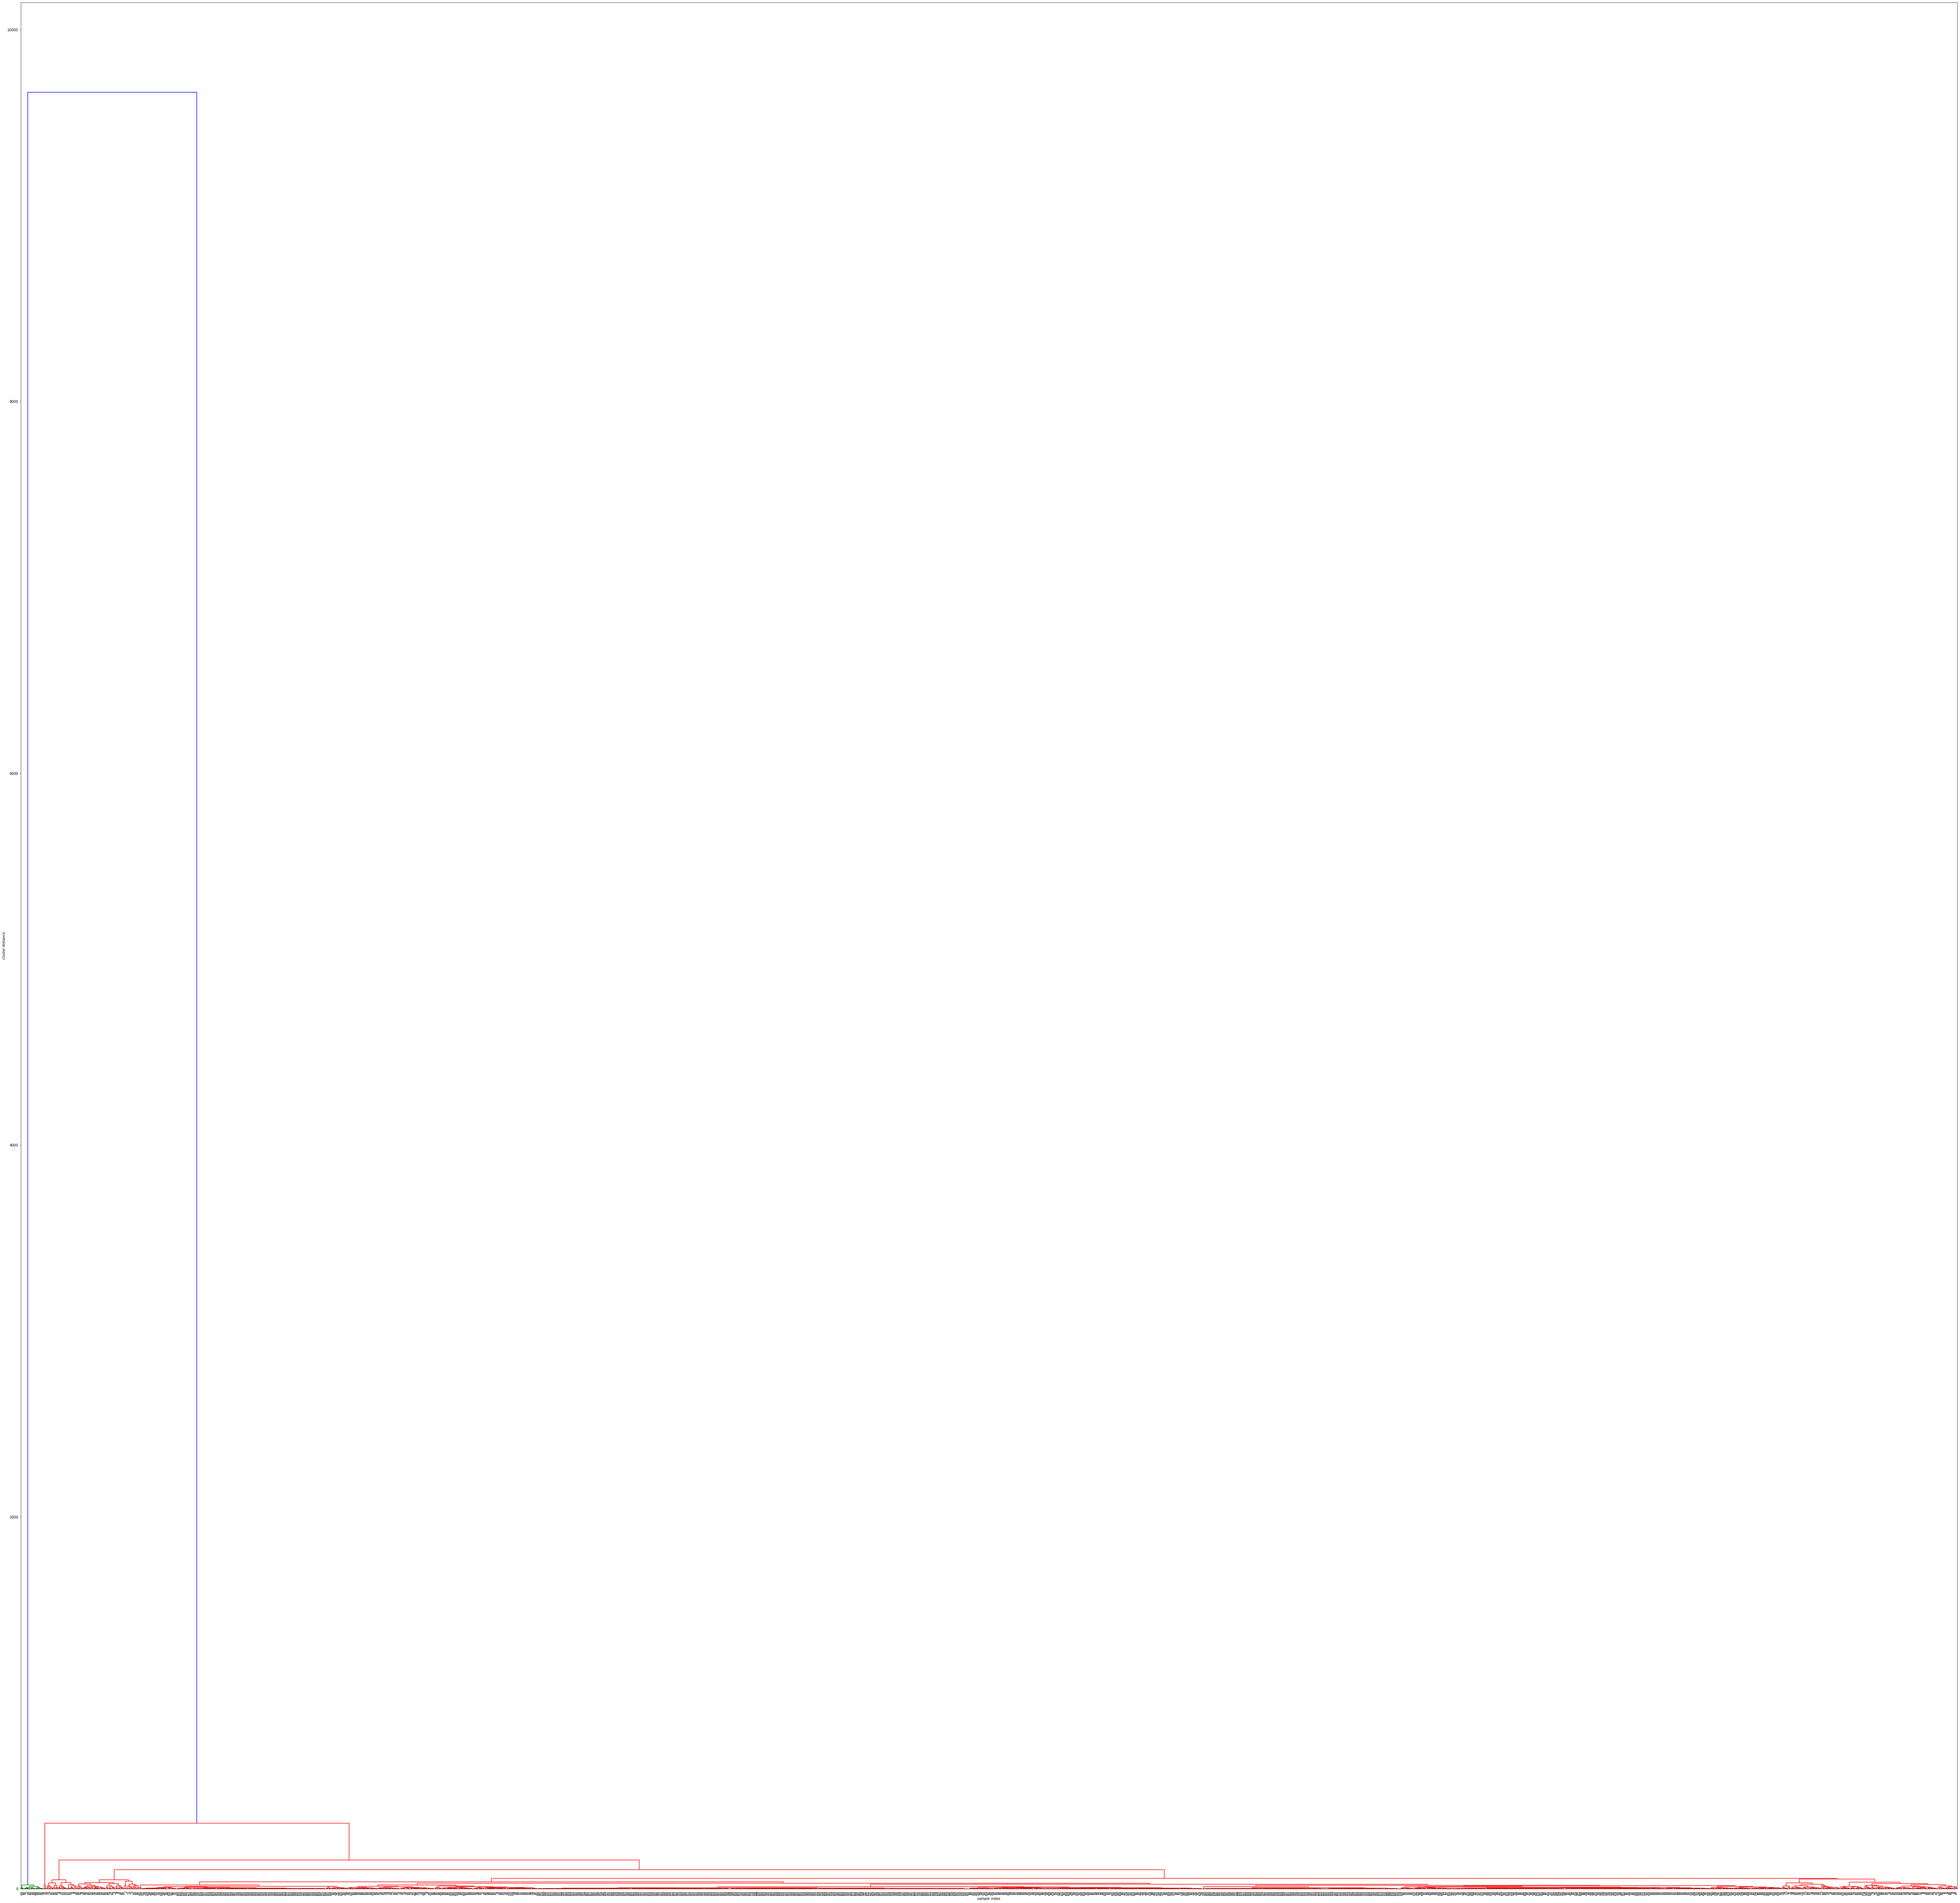

In [ ]:
from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

Z = linkage(X, 'weighted')
fig = plt.figure(figsize=(100,100))
dn = dendrogram(Z)
plt.xlabel('sample index')
plt.ylabel('cluster distance')
plt.show()

In [ ]:
X.shape

(2208, 9)